In [31]:
from __future__ import print_function
import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 5
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
filepath="/Users/iris/rengongzhineng_daolun/text-classification-master/saved_models/keras_cifar10_trained_model.h5"
'''

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
'''
model = load_model(filepath)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,steps_per_epoch = 1000)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/5
1000/1000 [==============================] - 59s 59ms/step - loss: 0.9084 - acc: 0.6814 - val_loss: 0.8127 - val_acc: 0.7232
Epoch 2/5
1000/1000 [==============================] - 59s 59ms/step - loss: 0.8984 - acc: 0.6872 - val_loss: 0.8300 - val_acc: 0.7138
Epoch 3/5
1000/1000 [==============================] - 63s 63ms/step - loss: 0.9106 - acc: 0.6831 - val_loss: 0.8086 - val_acc: 0.7180
Epoch 4/5
1000/1000 [==============================] - 61s 61ms/step - loss: 0.8900 - acc: 0.6900 - val_loss: 0.7570 - val_acc: 0.7415
Epoch 5/5
1000/1000 [==============================] - 64s 64ms/step - loss: 0.8953 - acc: 0.6912 - val_loss: 0.8453 - val_acc: 0.7072
Saved trained model at /Users/iris/rengongzhineng_daolun/text-classification-master/saved_models/keras_cifar10_trained_model.h5 
10000/10000 [==============================] - 6s 565us/step
Test loss: 0.84528905763626

<Figure size 1152x1152 with 0 Axes>

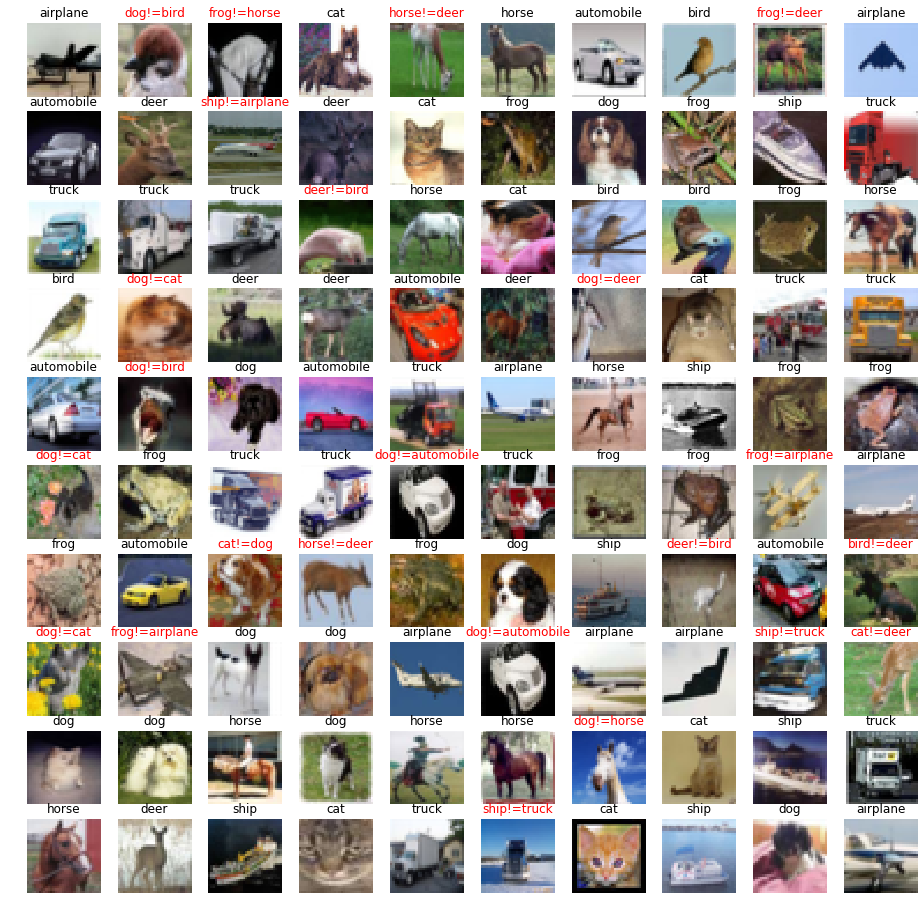

The number of correct answers: 77
The number of mistake: 23
A correct answer rate: 77.0 %


In [53]:
from __future__ import print_function
import random
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

%matplotlib inline

cifar10_labels = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck']
def convertCIFER10Data(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(32*32*3).reshape((1,32,32,3))
    c[0] = img
    return c

plt.figure(figsize=(16,16))

right = 0
mistake = 0
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

filepath="/Users/iris/rengongzhineng_daolun/text-classification-master/keras_cifar10_trained_model.h5"
model = load_model(filepath)
def convertCIFER10Data(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(32*32*3).reshape((1,32,32,3))
    c[0] = img
    return c

plt.figure(figsize=(16,16))

right = 0
mistake = 0

for i in range(100):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    data = convertCIFER10Data(image)

    plt.subplot(10, 10, i+1)
    plt.imshow(image)
    plt.axis('off')

    ret = model.predict(data, batch_size=1) 
    #print(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n

    if y_test[index] == bestclass:
        plt.title(cifar10_labels[bestclass])
        right += 1
    else:
        plt.title(cifar10_labels[bestclass] + "!=" + cifar10_labels[y_test[index][0]], color='#ff0000')
        mistake += 1
                                                                   
plt.show()
print("The number of correct answers:", right)
print("The number of mistake:", mistake)
print("A correct answer rate:", right/(mistake + right)*100, '%')